## Домашнее задание к лекции "Визуализация данных"

#### Обязательная часть
> Вам необходимо провести базовый EDA выбранного набора данных. \
Требования к анализу: \
построить не менее 4 визуализаций различных видов; \
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; \
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?). 

#### Дополнительная часть (необязательная)
> построить дополнительно не менее 2 визуализаций (итого не менее 6); \
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [ ]:
# за основу беру наши корпоративные данные data.txt

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

In [332]:
columns = [
    'ID',
    'date_of_order',
    'client',
    'brand',
    'prof_number',
    'date_of_proforma',
    'amount',
    'weight',
    'status',
    'truck_number',
    'comments'
        ]
data_file_location = 'data.txt'                                                                             # указываем путь к файлу
df = pd.read_csv(data_file_location, header=None, sep=';', encoding='1251', names = columns, decimal=',')   # считываем файл в датафрейм
df['date_of_proforma'] =  pd.to_datetime(df['date_of_proforma'], format='%d.%m.%Y %H:%M:%S')                # преобразовываем дату
df['date_of_order'] =  pd.to_datetime(df['date_of_order'], format='%d.%m.%Y %H:%M:%S')
df.head()

,ID,date_of_order,client,brand,prof_number,date_of_proforma,amount,weight,status,truck_number,comments
0,760,2020-02-28,XTILE,Ariana,2009903952,2020-02-26,1610.61,1536.0,Отгружен клиенту,10/20,оплачено
1,757,2020-02-27,Vodoley,Ragno,20200079681,2020-02-25,3957.34,4382.0,Отгружен клиенту,10/20,"оплачено - за минусом 64,41 евро"
2,755,2020-02-27,ProTILE,41zero42,911291,2020-02-25,378.88,281.0,Отгружен клиенту,10/20,оплачено
3,759,2020-02-28,XTILE,Versace,2804,2020-02-20,1482.49,647.0,Отгружен клиенту,11/20,оплачено
4,766,2020-03-03,ProTILE,CasalGrande,1.596/P,2020-03-02,1099.38,3237.0,Отгружен клиенту,11/20,оплачено


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1508 non-null   int64         
 1   date_of_order     1508 non-null   datetime64[ns]
 2   client            1508 non-null   object        
 3   brand             1508 non-null   object        
 4   prof_number       816 non-null    object        
 5   date_of_proforma  801 non-null    datetime64[ns]
 6   amount            1508 non-null   float64       
 7   weight            1505 non-null   float64       
 8   status            1508 non-null   object        
 9   truck_number      1508 non-null   object        
 10  comments          1101 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 129.7+ KB


In [334]:
# заполним пропущенные веса нулями
df['weight'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1508 non-null   int64         
 1   date_of_order     1508 non-null   datetime64[ns]
 2   client            1508 non-null   object        
 3   brand             1508 non-null   object        
 4   prof_number       816 non-null    object        
 5   date_of_proforma  801 non-null    datetime64[ns]
 6   amount            1508 non-null   float64       
 7   weight            1508 non-null   float64       
 8   status            1508 non-null   object        
 9   truck_number      1508 non-null   object        
 10  comments          1101 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 129.7+ KB


In [335]:
# удалим некоторые данные по условию
ignore='Catalano'
df.drop(df.loc[df['brand']==ignore].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1507
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1500 non-null   int64         
 1   date_of_order     1500 non-null   datetime64[ns]
 2   client            1500 non-null   object        
 3   brand             1500 non-null   object        
 4   prof_number       808 non-null    object        
 5   date_of_proforma  793 non-null    datetime64[ns]
 6   amount            1500 non-null   float64       
 7   weight            1500 non-null   float64       
 8   status            1500 non-null   object        
 9   truck_number      1500 non-null   object        
 10  comments          1093 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 140.6+ KB


In [359]:
# датафрейм с суммой стоимости и веса заказов по годам
# df_sum = df[['amount', 'weight']].groupby(df['date_of_order'].dt.year).sum()
# датафрейм с количеством заказов по годам
# df_count = df[['ID']].groupby(df['date_of_order'].dt.year).count()
# объеддиненный датафрейм
# df_years=df_sum.merge(df_count, how = 'outer', left_on='date_of_order', right_on='date_of_order')
# создаем столбец из индекса
#df_years.reset_index(level=0, inplace=True)
# df_years

In [391]:
# датафрейм с суммой стоимости и веса заказов по годам
df_years = df.groupby(df['date_of_order'].dt.year).agg({'amount': 'sum', 'weight': 'sum', 'ID': ['count']})
# создаем столбец из индекса
#df_years.reset_index(level=0, inplace=True)
df_years.head()

,amount,weight,ID
,sum,sum,count
date_of_order,,,
2018,478349.06,528262.0,207
2019,1496762.55,1016808.0,382
2020,2081570.95,1082405.0,713
2021,491923.87,247787.0,198


([<matplotlib.axis.XTick at 0x198e7190>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

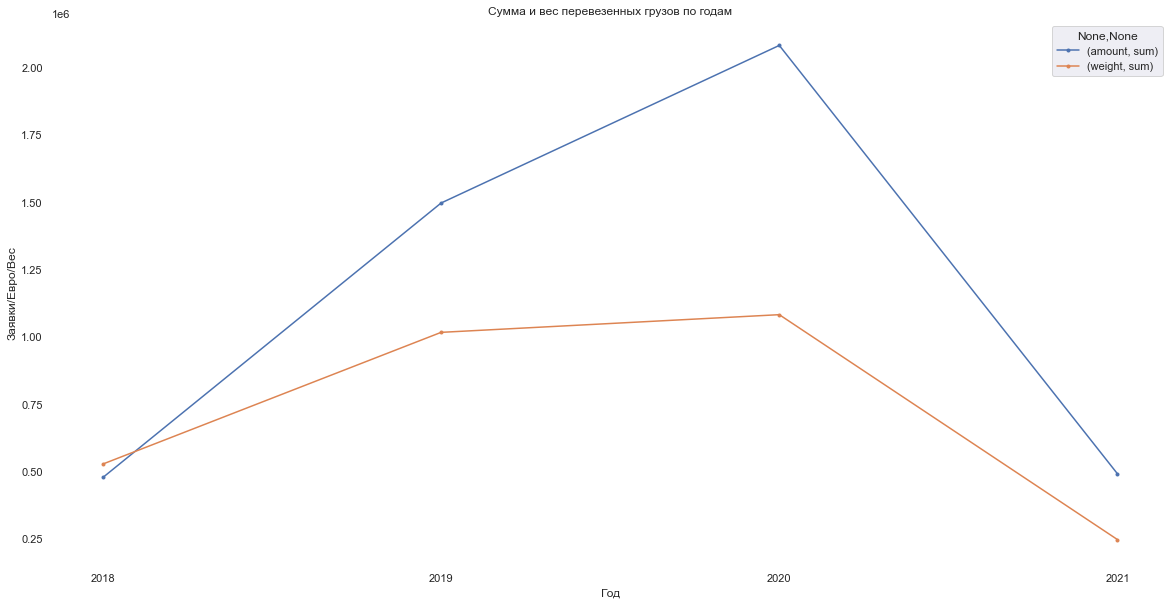

In [392]:
# plot без цикла построит графики для стоимости и веса
years = sorted(df['date_of_order'].dt.year.unique()) #[2018, 2019, 2020, 2021]
ax = df_years[['amount','weight']].plot(title='Сумма и вес перевезенных грузов по годам', 
                             xlabel='Год', 
                             ylabel='Заявки/Евро/Вес', style='.-')
ax.set(facecolor = "white")
ax.grid(False)
#ax.legend(loc='upper left')
plt.xticks(years)

### Выводы по визуализации:
> очевидна положительная динамика объемов год от года \
данные за 2021 года являются не полными

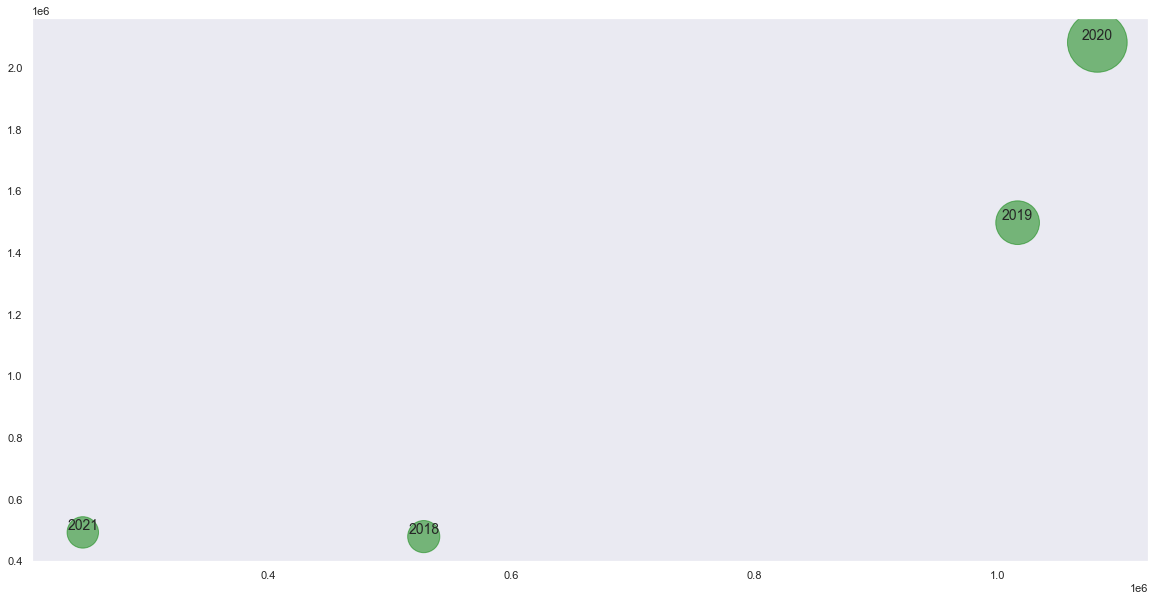

In [498]:
ax = plt.scatter(x='weight', y='amount',
                      s=df_years['ID']*5,
                      c='green',
                      alpha=0.5,     
                      data=df_years)
for index, row in df_years.iterrows():
    plt.text(int(row['weight']), int(row['amount']), int(index), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})
plt.grid(False)

### Выводы по визуализации:
>очевидна корреляцция объемов к количеству сделок

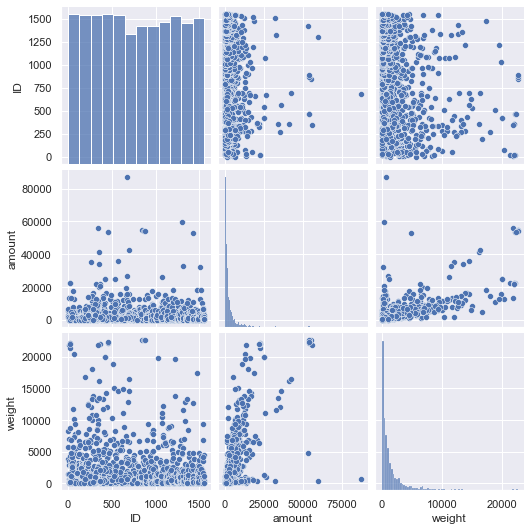

In [473]:
sns.pairplot(df)

### Выводы по визуализации:
>почти все сделки находятся в диапазонах до 20 тысяч евро и 15 тоннах
>основные сделки находятся в диапазоне до 10 тысяч евро и 10 тонн

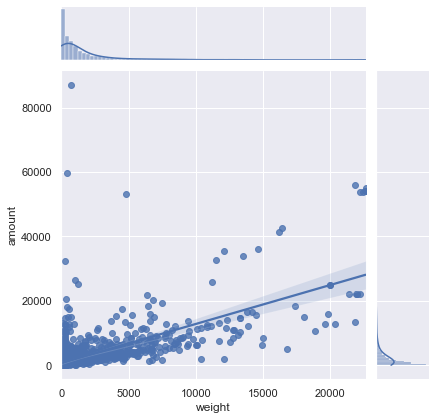

In [286]:
sns.jointplot(x='weight', y='amount', 
              data=df, kind='reg')

### Выводы по визуализации (отдельно выделенный и анализируемый выше элемент):
>почти все сделки находятся в диапазонах до 20 тысяч евро и 15 тоннах
>основные сделки находятся в диапазоне до 10 тысяч евро и 10 тонн

In [ ]:
# датафрейм с суммой стоимости и веса заказов по фабрикам
#df_sum = df[['amount', 'weight']].groupby(df['brand']).sum()
# датафрейм с количеством заказов по фабрикам
#df_count = df[['ID']].groupby(df['brand']).count()
# объеддиненный датафрейм
#df_brands=df_sum.merge(df_count, how = 'outer', left_on='brand', right_on='brand')
# создаем столбец из индекса
#df_df_brands.reset_index(level=0, inplace=True)
#df_brands
### как еще можно было реализовать один датафрейм с количеством ID и суммой amount и weight?
### у меня был альтернативный вариант с функцией agg (sum и count) но я почему-то не смог обращаться к агрегированным столбцам

In [518]:
figure=20
# датафрейм с суммой стоимости и веса заказов по годам в разрезе брендов
df_brands = df.groupby(df['brand']).agg({'amount': 'sum', 'weight': 'sum', 'ID': ['count']})
# создаем столбец из индекса
#df_years.reset_index(level=0, inplace=True)
df_brands.head()

,amount,weight,ID
,sum,sum,count
brand,,,
41zero42,26624.30,13514.0,17
ABK,11271.07,7826.0,5
Adex,231530.51,72737.0,50
Akros,5281.00,170.0,1
Alfalux,5523.83,7612.0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


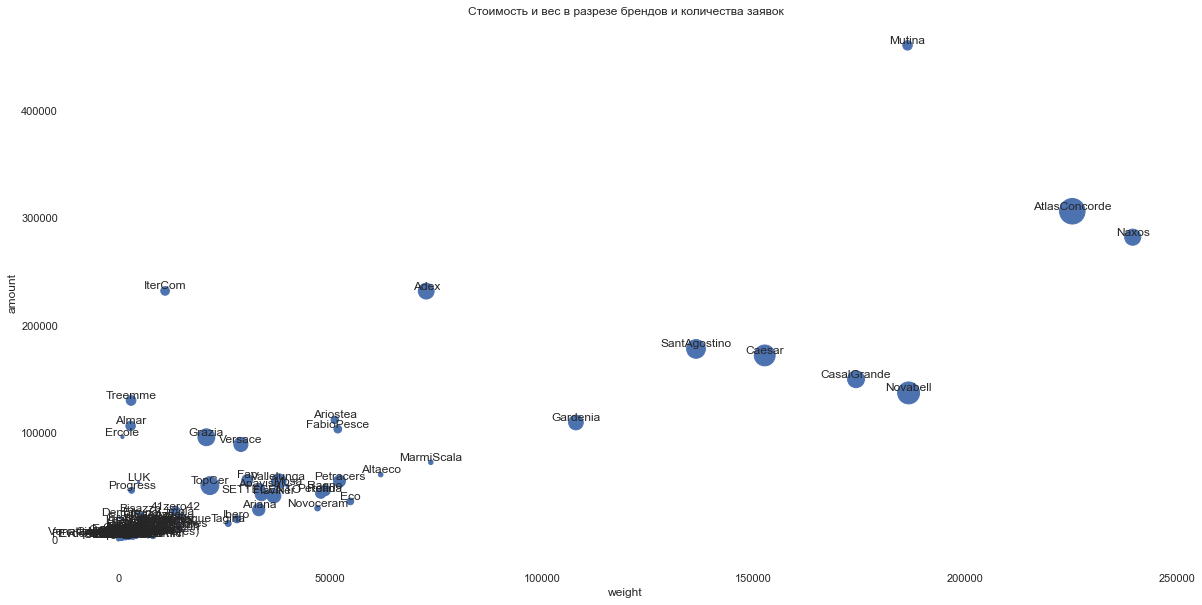

In [519]:
ax = df_brands.plot(kind='scatter', 
        x='weight', 
        y='amount', 
        s=df_brands['ID']*5,
        title='Стоимость и вес в разрезе брендов и количества заявок',
       )
for index, row in df_brands.iterrows():
    plt.text(int(row['weight']), int(row['amount']), index, horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})
ax.set(facecolor = "white")
ax.grid(False)
### почему выводится сообщение красным ниже?

### Выводы по визуализации:
>очевидны явные фавориты по брендам \
на топах подтверждается зависимость общей стоимости и веса к объему заказов, \
однако выделяются несколько брендов с малым весом, небольшим количеством заявок \
и большими "чеками" IterCom, Tremme, Almar, что обусловлено другим характером грузов: \
сантехника и мебель, тогда как остальные бренды плиточные

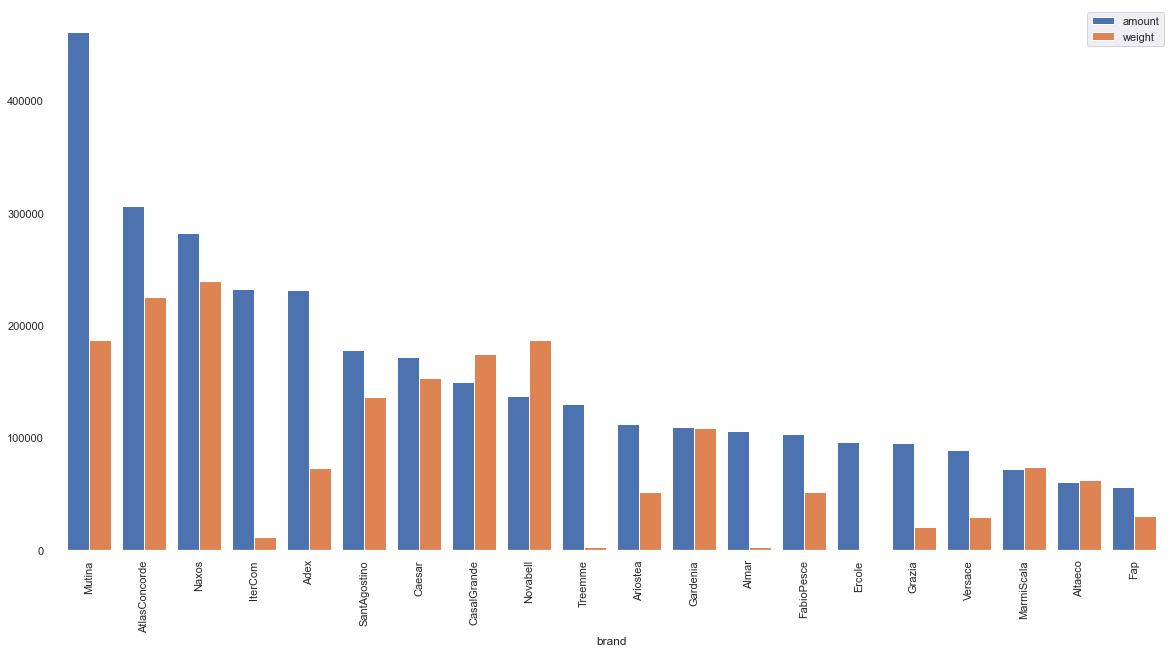

In [513]:
# топ-20 за всё время
df_brands_top = df.groupby(df['brand']).sum().drop('ID', 1).sort_values(by='amount', ascending=False).head(20)
ax = df_brands_top.plot(kind='bar', width=0.8)
ax.set(facecolor = "white")
ax.grid(False)

### Выводы по визуализации:
>по сути это более понятная интерпретация предыдущей аналитики \
стоимость и вес перевезенных грузов с сортировкой по стоимости

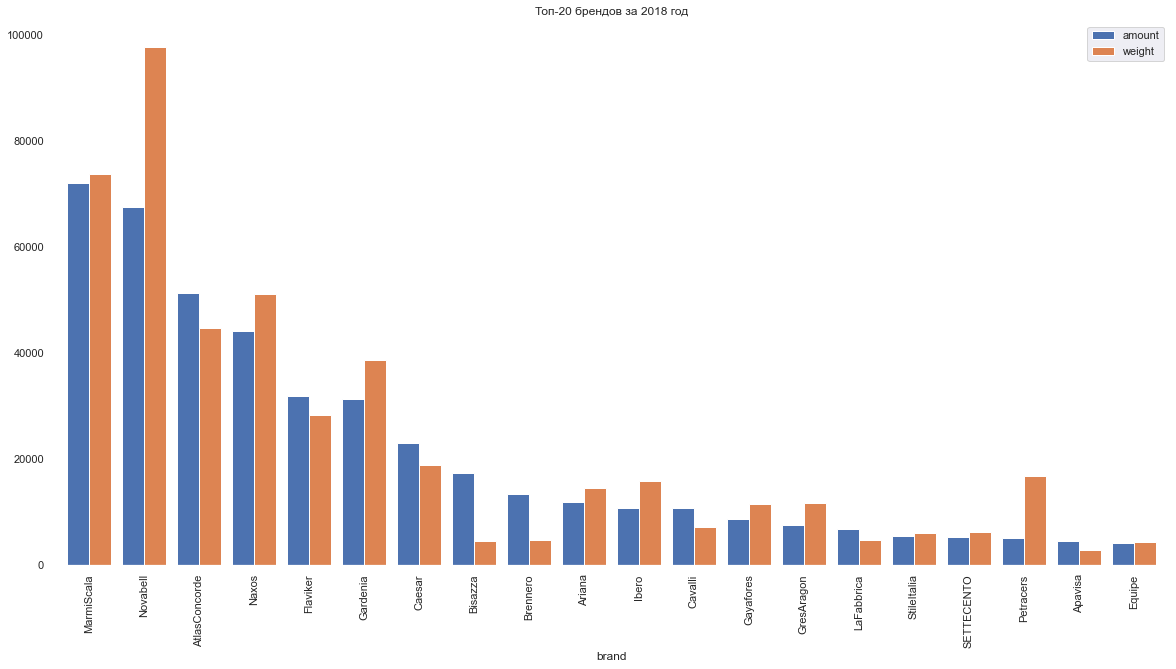

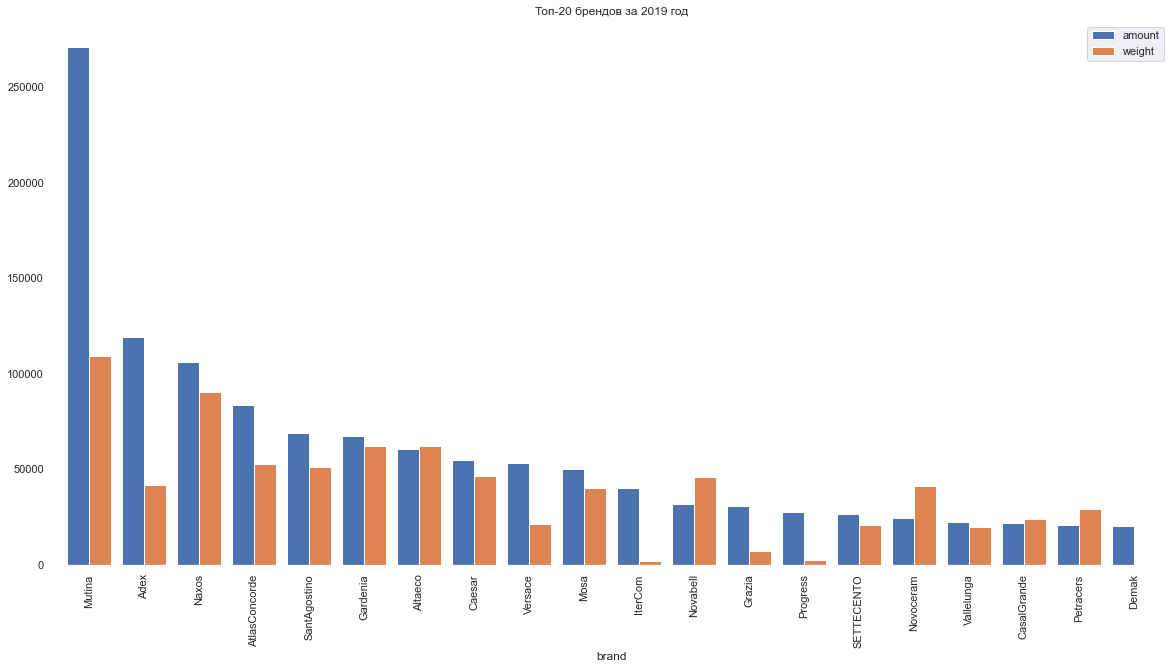

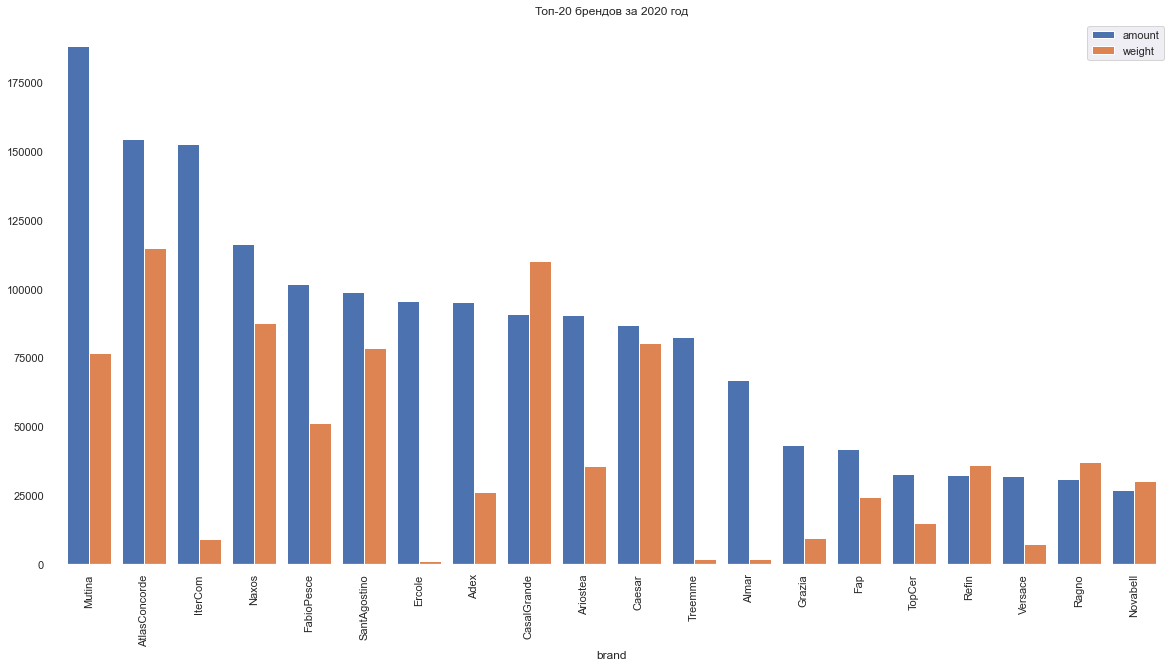

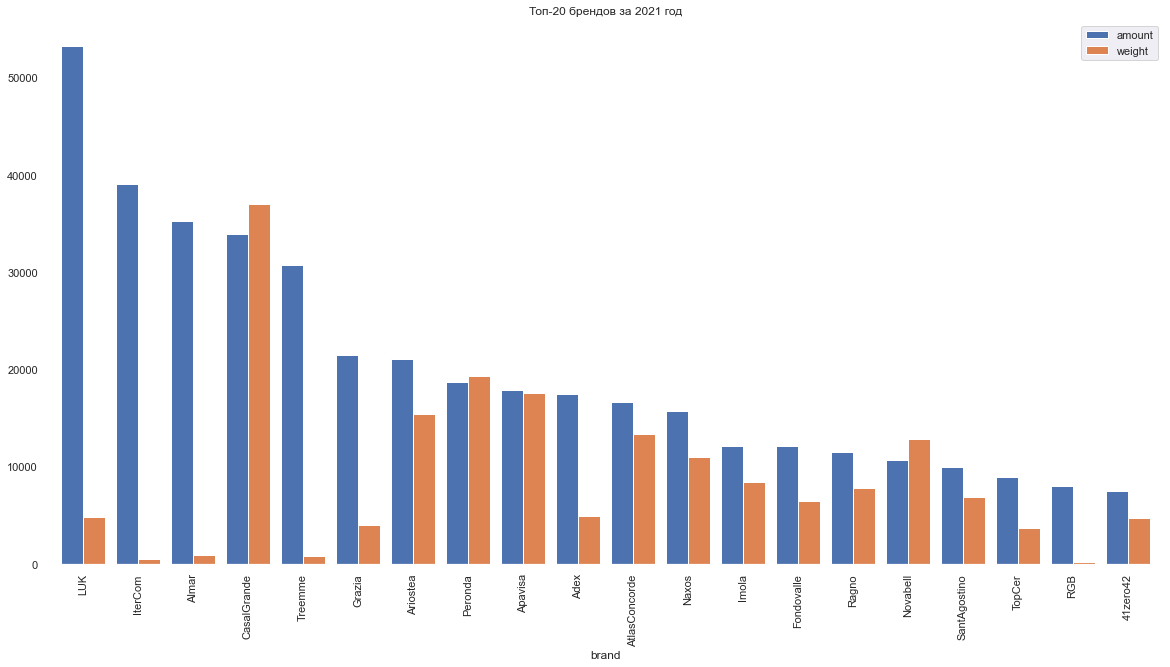

In [478]:
# топ-20 фабрик по продажам за каждый год
years = sorted(df['date_of_order'].dt.year.unique()) #[2018, 2019, 2020, 2021]
figure = 20
for year in years:
    df_brands_top = df.loc[df['date_of_order'].dt.year==year].groupby(df['brand']).sum().drop('ID', 1).sort_values(by='amount', ascending=False).head(figure)
    ax = df_brands_top.plot(kind='bar', width=0.8, title=f'Топ-{figure} брендов за {year} год')
    ax.set(facecolor = "white")
    ax.grid(False)

### Выводы по визуализации:
>более детальная (по годам) визуализация предыдущей аналитики \
видны изменения в составке топ-20 от года к году

In [553]:
# топ-n за всё время
figure = 15
# формируем топ-n таблицу
df_brands_top = df.groupby(df['brand']).sum().drop('ID', 1).sort_values(by='amount', ascending=False).head(figure)
# формируем таблицу только с брендами из топ-n
df_heat = df.loc[df['brand'].isin(df_brands_top.index.tolist())] #.groupby(df['brand']).sum().drop('ID', 1).sort_values(by='amount', ascending=False)
df_heat

,ID,date_of_order,client,brand,prof_number,date_of_proforma,amount,weight,status,truck_number,comments
4,766,2020-03-03,ProTILE,CasalGrande,1.596/P,2020-03-02,1099.38,3237.0,Отгружен клиенту,11/20,оплачено
5,763,2020-03-02,Diart,CasalGrande,1.564/P,2020-02-28,858.10,777.0,Отгружен клиенту,11/20,оплачено
6,762,2020-02-28,XTILE,SantAgostino,2553086000134,2020-02-27,1663.33,1382.0,Отгружен клиенту,11/20,оплачено
12,769,2020-03-04,Vial,AtlasConcorde,10806,2020-02-26,1264.91,953.0,Отгружен клиенту,11/20,оплачено
14,758,2020-02-28,XTILE,Adex,3539,2020-02-20,5095.68,881.0,Отгружен клиенту,13/20,оплачено + CST 355 + 35 (на обе проформы)
...,...,...,...,...,...,...,...,...,...,...,...
1489,1535,2021-03-27,KimElena,Novabell,PRF21-11250,2021-03-24,1.00,10.0,Оплачено фабрике,13/21,оплачено
1490,1515,2021-03-16,Vodoley,Caesar,72643,2021-03-05,2415.27,2300.0,Оплачено фабрике,11/21,оплачено
1497,1542,2021-04-01,ProTILE,CasalGrande,2.465/P,2021-03-30,6474.55,9379.0,Счет на предоплату,13/21,не оплачено
1498,1543,2021-04-01,ProTILE,CasalGrande,2.466/P,2021-03-30,2545.03,1533.0,Счет на предоплату,13/21,не оплачено


In [573]:
# формируем сводную таблицу на основе отобранной c возможностью выбора столбцов/строк
reverse = True
if reverse:
    index=df_heat['date_of_order'].dt.year
    column=['brand']
else:
    index=['brand']
    column=df_heat['date_of_order'].dt.year
table = pd.pivot_table(df_heat, values='amount', index=index,
                    columns=column, aggfunc=sum).fillna(0)
table

brand,Adex,Almar,Ariostea,AtlasConcorde,Caesar,CasalGrande,Ercole,FabioPesce,Gardenia,IterCom,Mutina,Naxos,Novabell,SantAgostino,Treemme
date_of_order,,,,,,,,,,,,,,,
2018,0.00,0.00,0.00,51375.25,23011.47,2603.11,0.00,0.00,31223.65,0.00,0.00,44030.06,67606.51,0.00,0.00
2019,118967.01,3730.96,0.00,83657.83,54996.69,21939.48,0.00,1428.00,67115.14,40140.00,270881.47,105988.65,31636.26,69009.95,16614.78
2020,95074.23,66949.86,90626.26,154307.12,86889.74,90979.58,95651.25,101546.91,10303.89,152573.39,188111.73,116104.14,26742.07,98671.07,82347.57
2021,17489.27,35250.77,21009.54,16587.57,6731.47,33914.65,0.00,0.00,466.64,39020.92,1508.88,15671.46,10700.44,10006.24,30712.40


<AxesSubplot:xlabel='brand', ylabel='date_of_order'>

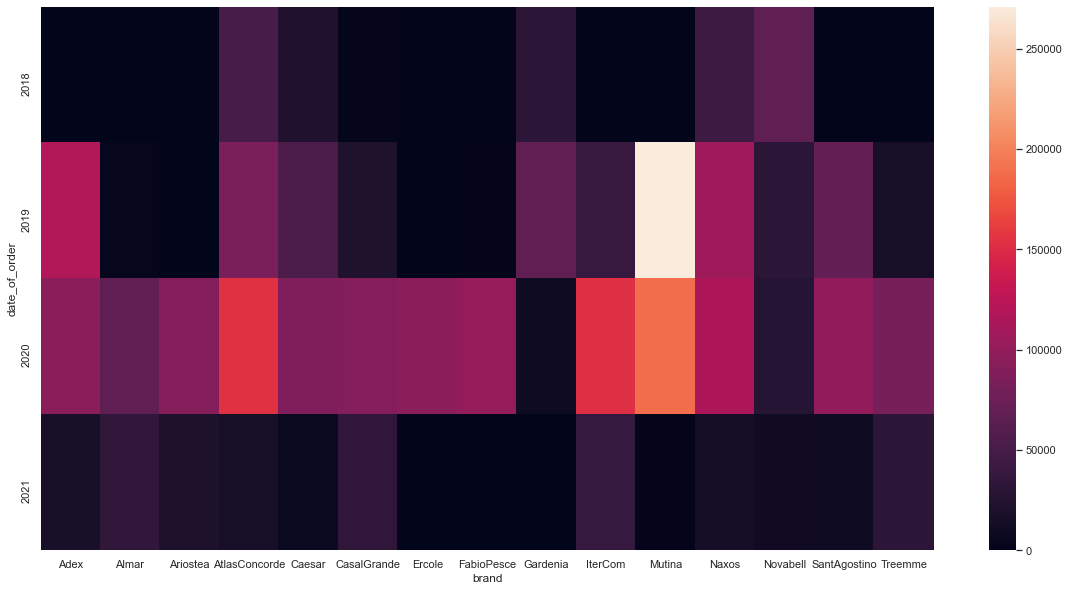

In [574]:
# создаем тепловую карту на основе сводной таблицы
sns.heatmap(table)

### Выводы по визуализации:
>визуализация по отобранным топ-n брендам в разрезе года \
в зависимости от того что выбрано столбцами, а что строками можно видеть \
как лучшие бренды относительно друг-друга в отдельно взятый год, \
так и лучший для бренда год